In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('../Data/incidents_ca.csv', low_memory=False)
df.head()

,ABCD Misc,Additional Fuel Model,ADS Permission State,Calculated Acres,Containment Date Time,Control Date Time,Created By System,Created On Date Time,Critical Resource Needs,Daily Acres,Discovery Acres,Dispatch Center ID,Estimated Containment Date,Estimated Cost To Date,Fatalities,Final Acres,Final Fire Report Approved By,Final Fire Report Approved By Title,Final Fire Report Approved By Unit,Final Fire Report Approved Date,Final Fire Report Narrative,Final Strategy Attained Date Time,Fire Behavior Description,Fire Behavior General,Fire Behavior General 1,Fire Behavior General 2,Fire Behavior General 3,Fire Cause,Fire Cause General,Fire Cause Specific,Fire Code,Fire Department ID,Fire Discovery Date Time,Fire Growth Cessation Date Time,Fire Ignition Date Time,Fire Mgmt Complexity,Fire Out Date Time,Fire Strategy Confine Percent,Fire Strategy Full Supp Percent,Fire Strategy Monitor Percent,Fire Strategy Point Zone Percent,Fiscally Responsible Unit,FS Job Code,FS Override Code,Geographic Area Coordination Center Code,Has Fatalities,Has Injuries,ICS209 Remarks,ICS209 Report Date Time,ICS209 Report For Time Period From,ICS209 Report For Time Period To,ICS209 Report Status,Incident Commander Name,Incident Management Organization,Incident Name,Incident Short Description,Incident Type Category,Incident Type Kind,INFORM User Name,In Fuel Treatment,Initial Fire Strategy,Initial Latitude,Initial Longitude,Initial Response Acres,Initial Response Date Time,Injuries,In NFPORS,Irwin ID,Is Fire Cause Investigated,Is Fire Code Requested,Is FS Assisted,Is Initial Fire Strategy Met,Is Multi Jurisdictional,Is Quarantined,Is Reimbursable,Is Trespass,Is Unified Command,Is Valid,Local Incident Identifier,Modified By System,Modified On Date Time,OBJECTID,Other Structures Destroyed,Other Structures Threatened,Percent Contained,Percent Perimeter To Be Contained,Planned Actions,POO City,POO County,POO Dispatch Center ID,POO Fips,POO Jurisdictional Agency,POO Jurisdictional Unit,POO Jurisdictional Unit Parent Unit,POO Landowner Category,POO Landowner Kind,POO Legal Desc Principal Meridian,POO Legal Desc Qtr,POO Legal Desc Qtr Qtr,POO Legal Desc Range,POO Legal Desc Section,POO Legal Desc Township,POO Predictive Service Area ID,POO Protecting Agency,POO Protecting Unit,POO State,Predominant Fuel Group,Predominant Fuel Model,Primary Fuel Model,Projected Incident Activity 12,Projected Incident Activity 24,Projected Incident Activity 48,Projected Incident Activity 72,Projected Incident Activity 72 Plus,Residences Destroyed,Residences Threatened,Secondary Fuel Model,Significant Events,Summary Fuel Model,Total Incident Personnel,Unique Fire Identifier,Weather Concerns,WFDSS Decision Status,GlobalID,Estimated Final Cost,Organizational Assessment,Relative Risk Rating,WFDSS Strategy Slider Value,Strategic Decision Publish Date,Archived On,POO Fire Intensity Level,Primary Weather Station Identifier,POO On Unprotected Land,Unprotected Land Response Reason,The method by which the fire was detected.,POO Latitude,POO Longitude
0,NaN,NaN,DEFAULT,NaN,NaN,NaN,cfcad,3/10/22 13:02,NaN,NaN,0.1,CASIFC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Undetermined,NaN,NaN,PG8L,NaN,3/10/22 12:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ONCC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COYOTE,NaN,Debris/Product Fire,Fire,NaN,NaN,NaN,40.881423,-120.991760,NaN,NaN,NaN,NaN,2ec70a63-c28a-4f73-9c80-ca7b3b9286af,NaN,False,True,NaN,True,False,True,True,NaN,True,001156,firecode,3/10/22 13:02,245830,NaN,NaN,NaN,NaN,NaN,NaN,Lassen,CASIFC,6035,NaN,NaN,NaN,Individual or Private Corporation,Private,NaN,NaN,NaN,NaN,NaN,NaN,NC06,CDF,CALMU,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-CALMU-001156,NaN,No Decision,c5536b2f-011a-42ad-bb35-d34588752000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.881423,-120.991760
1,NaN,NaN,DEFAULT,NaN,NaN,NaN,cfcad,3/10/22 12:03,NaN,NaN,0.1,CAMMCC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Undetermined,NaN,NaN,Na

In [52]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [53]:
df.shape

(10000, 137)

In [54]:
# All columns with 100% null values
[col for col in df if df[col].isnull().sum() == df.shape[0]]

['Critical Resource Needs',
 'Final Acres',
 'Final Fire Report Approved By Title',
 'Final Fire Report Approved By Unit',
 'Fire Behavior Description',
 'Fiscally Responsible Unit',
 'Has Fatalities',
 'Has Injuries',
 'POO Jurisdictional Unit Parent Unit',
 'Archived On']

### Cleaning Up Column Types for Important Columns

In [55]:
df['Initial Response Acres'].replace(',', '', regex=True, inplace=True)

In [56]:
df['Initial Response Acres'] = df['Initial Response Acres'].astype(float)

In [57]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 137 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    ABCD Misc                                   object 
 1    Additional Fuel Model                       object 
 2    ADS Permission State                        object 
 3    Calculated Acres                            object 
 4    Containment Date Time                       object 
 5    Control Date Time                           object 
 6    Created By System                           object 
 7    Created On Date Time                        object 
 8    Critical Resource Needs                     float64
 9    Daily Acres                                 object 
 10   Discovery Acres                             object 
 11   Dispatch Center ID                          object 
 12   Estimated Containment Date                  object 
 13   Estimated Cost 

In [58]:
df['Calculated Acres'].replace(',', '', regex=True, inplace=True)

In [59]:
df['Calculated Acres'] = df['Calculated Acres'].astype(float)

In [60]:
df['Calculated Acres'].isnull().sum()

9815

In [61]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 137 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    ABCD Misc                                   object 
 1    Additional Fuel Model                       object 
 2    ADS Permission State                        object 
 3    Calculated Acres                            float64
 4    Containment Date Time                       object 
 5    Control Date Time                           object 
 6    Created By System                           object 
 7    Created On Date Time                        object 
 8    Critical Resource Needs                     float64
 9    Daily Acres                                 object 
 10   Discovery Acres                             object 
 11   Dispatch Center ID                          object 
 12   Estimated Containment Date                  object 
 13   Estimated Cost 

In [62]:
df['Daily Acres'].isnull().sum(), df['Discovery Acres'].isnull().sum()

(8571, 643)

In [63]:
df['Discovery Acres'].replace(',', '', regex=True, inplace=True)

In [64]:
df['Daily Acres'].replace(',','', regex=True, inplace=True)

In [65]:
df['Daily Acres'].isnull().sum(), df['Discovery Acres'].isnull().sum()

(8571, 643)

In [66]:
df['Discovery Acres'] = df['Discovery Acres'].astype(float)

In [67]:
df['Daily Acres'] = df['Daily Acres'].astype(float)

In [68]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 137 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    ABCD Misc                                   object 
 1    Additional Fuel Model                       object 
 2    ADS Permission State                        object 
 3    Calculated Acres                            float64
 4    Containment Date Time                       object 
 5    Control Date Time                           object 
 6    Created By System                           object 
 7    Created On Date Time                        object 
 8    Critical Resource Needs                     float64
 9    Daily Acres                                 float64
 10   Discovery Acres                             float64
 11   Dispatch Center ID                          object 
 12   Estimated Containment Date                  object 
 13   Estimated Cost 

In [69]:
df['total_acres'] = df['Discovery Acres'] + df['Daily Acres']

In [70]:
df['total_acres'].isnull().sum()

8620

In [71]:
df['total_acres'].value_counts()

0.200          408
1.100          302
2.000          126
0.110           55
0.600           30
0.400           24
1.500           20
1.250           18
0.350           13
1.300           13
3.000            9
1.200            9
2.500            9
0.300            8
1.000            7
2.100            7
4.000            6
0.500            6
0.020            6
1.010            5
0.550            5
5.000            5
0.310            4
1.600            4
3.100            4
14.100           4
3.250            3
1.800            3
1.140            3
0.210            3
18.000           3
12.000           3
2.200            3
0.800            3
0.510            3
1.020            2
5.100            2
8.100            2
6.500            2
1.120            2
0.900            2
20.100           2
0.800            2
5.400            2
2.400            2
3.200            2
7.100            2
1.750            2
7.000            2
1.700            2
1.170            2
7.600            2
1.470       

In [72]:
df.filter(regex='[A-Z]ate').columns

Index(['Containment Date Time', 'Control Date Time', 'Created On Date Time',
       'Estimated Containment Date', 'Estimated Cost To Date',
       'Final Fire Report Approved Date', 'Final Strategy Attained Date Time',
       'Fire Discovery Date Time', 'Fire Growth Cessation Date Time',
       'Fire Ignition Date Time', 'Fire Out Date Time',
       'ICS209 Report Date Time', 'Incident Type Category',
       'Initial Response Date Time', 'Modified On Date Time',
       'POO Landowner Category', 'Strategic Decision Publish Date'],
      dtype='object')

In [73]:
df['Created On Date Time'] = df['Created On Date Time'].astype('datetime64')

In [74]:
df['Created On Date Time']

0      2022-03-10 13:02:00
1      2022-03-10 12:03:00
2      2022-03-10 11:58:00
3      2022-03-10 12:37:00
4      2022-03-10 12:25:00
5      2022-03-10 12:04:00
6      2022-02-20 16:25:00
7      2022-03-10 11:52:00
8      2022-03-10 11:41:00
9      2022-03-10 11:11:00
10     2022-03-10 11:13:00
11     2022-03-02 11:26:00
12     2022-03-10 10:44:00
13     2022-03-10 09:55:00
14     2022-03-10 09:49:00
15     2022-03-08 11:56:00
16     2022-03-10 08:05:00
17     2022-03-10 08:52:00
18     2022-03-10 08:30:00
19     2022-03-10 07:08:00
20     2022-03-10 07:03:00
21     2022-03-10 06:59:00
22     2022-03-10 06:57:00
23     2022-03-10 06:26:00
24     2022-03-10 06:10:00
25     2022-03-10 02:39:00
26     2022-03-10 04:56:00
27     2022-03-10 01:59:00
28     2022-03-10 00:56:00
29     2022-03-09 23:34:00
30     2022-03-09 22:59:00
31     2022-03-09 22:48:00
32     2022-03-09 22:49:00
33     2022-03-09 18:02:00
34     2022-03-09 22:44:00
35     2022-03-09 22:40:00
36     2022-03-09 22:36:00
3

In [75]:
df['Created On Date'] = df['Created On Date Time'].dt.to_period('M').apply(lambda d: pd.to_datetime(str(d)))
df['Created On Date']

0      2022-03-01
1      2022-03-01
2      2022-03-01
3      2022-03-01
4      2022-03-01
5      2022-03-01
6      2022-02-01
7      2022-03-01
8      2022-03-01
9      2022-03-01
10     2022-03-01
11     2022-03-01
12     2022-03-01
13     2022-03-01
14     2022-03-01
15     2022-03-01
16     2022-03-01
17     2022-03-01
18     2022-03-01
19     2022-03-01
20     2022-03-01
21     2022-03-01
22     2022-03-01
23     2022-03-01
24     2022-03-01
25     2022-03-01
26     2022-03-01
27     2022-03-01
28     2022-03-01
29     2022-03-01
30     2022-03-01
31     2022-03-01
32     2022-03-01
33     2022-03-01
34     2022-03-01
35     2022-03-01
36     2022-03-01
37     2022-03-01
38     2022-03-01
39     2022-03-01
40     2022-03-01
41     2022-03-01
42     2022-03-01
43     2022-03-01
44     2022-03-01
45     2022-03-01
46     2022-03-01
47     2022-03-01
48     2022-03-01
49     2022-03-01
50     2022-03-01
51     2022-03-01
52     2022-03-01
53     2022-03-01
54     2022-03-01
55     202

In [77]:
df['month_name'] = df['Created On Date'].dt.month_name()
df['month_name']

0           March
1           March
2           March
3           March
4           March
5           March
6        February
7           March
8           March
9           March
10          March
11          March
12          March
13          March
14          March
15          March
16          March
17          March
18          March
19          March
20          March
21          March
22          March
23          March
24          March
25          March
26          March
27          March
28          March
29          March
30          March
31          March
32          March
33          March
34          March
35          March
36          March
37          March
38          March
39          March
40          March
41          March
42          March
43          March
44          March
45          March
46          March
47          March
48          March
49          March
50          March
51          March
52          March
53          March
54          March
55        

In [79]:
df['year'] = df['Created On Date'].dt.year
df['year']

0       2022
1       2022
2       2022
3       2022
4       2022
5       2022
6       2022
7       2022
8       2022
9       2022
10      2022
11      2022
12      2022
13      2022
14      2022
15      2022
16      2022
17      2022
18      2022
19      2022
20      2022
21      2022
22      2022
23      2022
24      2022
25      2022
26      2022
27      2022
28      2022
29      2022
30      2022
31      2022
32      2022
33      2022
34      2022
35      2022
36      2022
37      2022
38      2022
39      2022
40      2022
41      2022
42      2022
43      2022
44      2022
45      2022
46      2022
47      2022
48      2022
49      2022
50      2022
51      2022
52      2022
53      2022
54      2022
55      2022
56      2022
57      2022
58      2022
59      2022
60      2022
61      2022
62      2022
63      2022
64      2022
65      2022
66      2022
67      2020
68      2022
69      2022
70      2022
71      2020
72      2022
73      2022
74      2022
75      2022
76      2022

In [82]:
df['year'].value_counts()

2021    6070
2022    3769
2020      46
2019      46
2017      36
2018      31
2015       1
2016       1
Name: year, dtype: int64

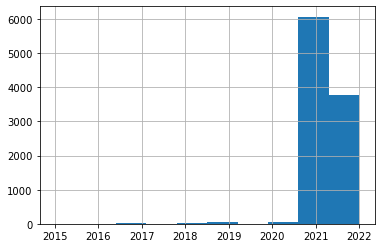

In [83]:
df['year'].hist();

In [25]:
'----' * 42

'------------------------------------------------------------------------------------------------------------------------------------------------------------------------'

In [ ]:
df['Final Fire Report Approved By Title'].value_counts()

In [ ]:
df.isnull().sum()

In [ ]:
df.info(verbose=True)

In [ ]:
df.filter(regex='Acres|acres|Acre|acre').columns

In [ ]:
df['Calculated Acres'].isnull().sum()

In [ ]:
df_acres = df[['Calculated Acres', 'Daily Acres', 'Discovery Acres', 'Final Acres',
       'Initial Response Acres']]

df_acres.isnull().sum()

In [ ]:
df.filter(regex='State|state').columns

In [ ]:
df['POO State'].value_counts()